<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%207/automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
!pip install pandas scikit-learn numpy

In [2]:
# Upload file CSV
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))

Saving Automobile.csv to Automobile.csv


In [3]:
# Pra-pemrosesan data
numeric_features = ['highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
                    'compression-ratio', 'stroke', 'bore', 'engine-size',
                    'wheel-base']
target = 'price'

# Hapus nilai null pada kolom yang digunakan
df_model = df[numeric_features + [target]].dropna()

# Pisahkan fitur dan target
X = df_model[numeric_features]
y = df_model[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Model Bagging (Random Forest)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Model Boosting (Gradient Boosting)
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

In [5]:
# Evaluasi
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

rf_result = evaluate_model("Random Forest (Bagging)", y_test, rf_preds)
gb_result = evaluate_model("Gradient Boosting (Boosting)", y_test, gb_preds)

# Tampilkan hasil
results_df = pd.DataFrame([rf_result, gb_result])
print(results_df)

                          Model           MSE         RMSE       R^2
0       Random Forest (Bagging)  1.355074e+07  3681.133434  0.888260
1  Gradient Boosting (Boosting)  1.325563e+07  3640.828012  0.890694



## Penjelasan Matematika Evaluasi Model

### **1. MSE (Mean Squared Error)**
MSE menghitung rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. Semakin kecil nilai MSE, maka model prediksi semakin akurat.

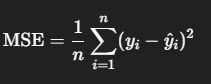

- \( n \): jumlah data
- \( yi \): nilai aktual ke-i
- \(y^i): nilai prediksi ke-i

---

### **2. RMSE (Root Mean Squared Error)**

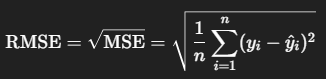

RMSE memberikan kesalahan dalam satuan asli, misalnya jika target adalah dolar, RMSE juga dalam dolar.

---

### **3. R² (R-squared)**

R² menunjukkan seberapa baik model memprediksi dibandingkan dengan model rata-rata. Nilainya berkisar dari 0 sampai 1 (kadang bisa negatif jika model sangat buruk).

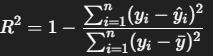

- Nilai R² mendekati 1 artinya model sangat baik
- Nilai R² negatif berarti model lebih buruk dari rata-rata
